In [22]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [23]:
import sys
sys.path.insert(1, "../utilities")
from plot_utils import *
from extract import *
from assigners import *
from effect_estimators import *
from experimental import *

In [24]:
def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

### Celldata

In [25]:
fnum=3
pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/cellresults/ttest/withGF/only32/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

cellshilicposGFstatus.csv
cellshilicposALPHA0.05FC1.0MINVAR0.125.csv


In [26]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2])

Area = data_significant.iloc[3:,8:48]
groups = data.iloc[0,8:48]
labels = LabelEncoder().fit_transform(groups)

### Plasmadata

In [313]:
fnum=1
pathGF = "../../../PARKINSONS/PDproj/plasmadata/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/plasmaresults/ttest/mv_32/pori0.05_FC0.5/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

plasmaHILICposGFstatus_log2.csv
plasmaHILICposGFstatus_pori_var0.06FC0.5.csv


In [314]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2,3], ' ')

Area = data_significant.iloc[4:,8:80]
groups = data.iloc[1,8:80]
gender = data.iloc[0,8:80]
labels = LabelEncoder().fit_transform(groups)

In [7]:
Area.shape

(58, 40)

In [8]:
df_select.head()

,compound,masstime,test,p_orig,p_FDR,p_Bonf,FC,ms,gaps1,gaps2
0,Proline,116.07097@4.86,aSYN--comb.,0.000011,0.002086,0.029822,-1.177233,-0.052846,0,0
1,Proline,116.07097@4.86,aSYN--INFg,0.000000,0.000086,0.000591,-1.174246,0.179163,0,0
2,Proline,116.07097@4.86,comb.--UT,0.000001,0.000185,0.001488,1.519828,0.299415,0,0
3,Proline,116.07097@4.86,INFg--UT,0.000000,0.000005,0.000016,1.516841,0.531425,0,0
4,Guanidineacetic acid,118.06147@5.74,aSYN--INFg,0.000187,0.022475,0.496665,-2.002590,-0.133613,0,0


In [27]:
sorted_ind=np.argsort(data_significant.iloc[3:,5])
data_significant.iloc[sorted_ind+3,:].head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
94,NaN,C30 H57 N O4,-0.07,495.42873,496.436,0.372,No MS2,[M+H]+1,19.054911837856597,18.620844098722333,...,0,0,0,0,0,0,0,0,64,0
106,NaN,C30 H54 O4,-0.21,478.40211,496.436,0.373,No MS2,[M+NH4]+1,19.054911837856597,18.620844098722333,...,64,64,64,64,64,64,64,64,0,64
24,13-hydroxy-alpha-tocopherol,C29 H50 O3,0.19,446.37608,447.38325,0.374,DDA for preferred ion,[M+H]+1,20.88434273807616,20.704578329289475,...,0,0,0,0,0,0,0,0,0,0
303,MFCD09743629,C27 H48 O2,0.67,404.3657,405.3727,0.378,No MS2,[M+H]+1,16.552989929027294,16.172452223805614,...,128,8,8,128,8,128,128,128,128,128
245,NaN,C21 H49 N4 O3 P,1.94,436.35507,419.35186,0.381,No MS2,[M+H-H2O]+1,17.760054334192844,17.391996173856526,...,64,64,64,64,64,128,64,64,128,128


In [10]:
X=data_significant.iloc[sorted_ind+4,8:80].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)[:,np.newaxis]
mass=data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)[:,np.newaxis]

IndexError: positional indexers are out-of-bounds

In [28]:
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]
mass=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]

In [460]:
cols=np.arange(5)
feature_ids = ["V{}_RT{}".format(i,val) for i,val in enumerate(rtime[cols])]

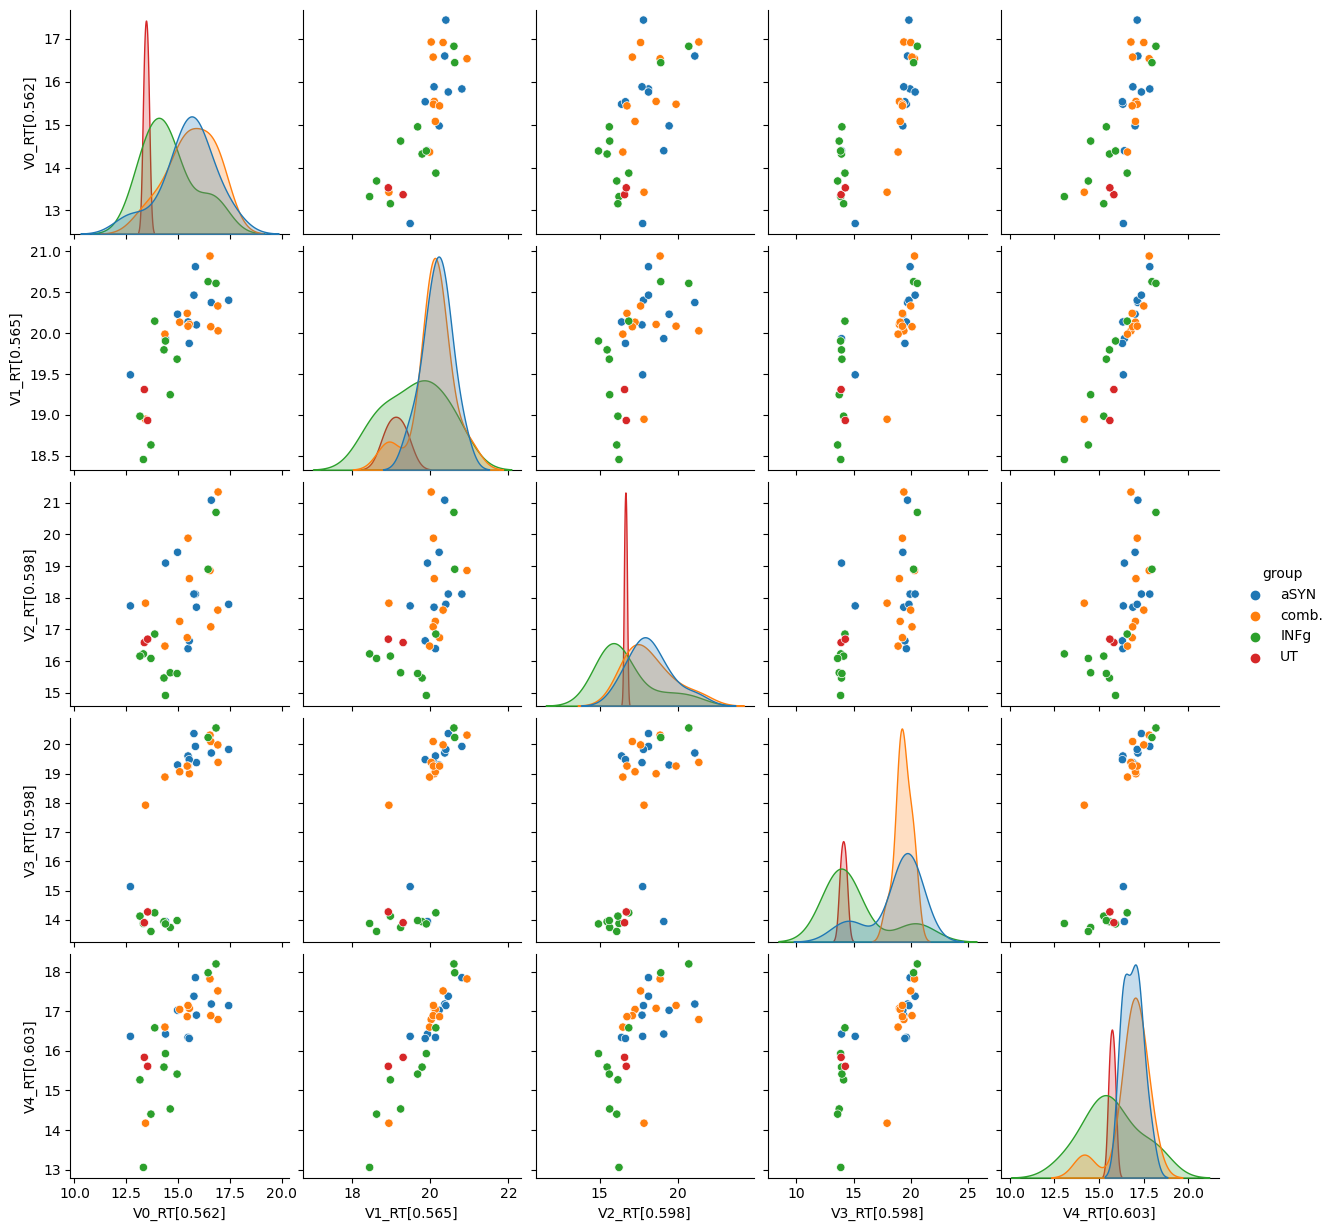

In [461]:
complete_pairplot(X[:,cols], groups, feature_ids)

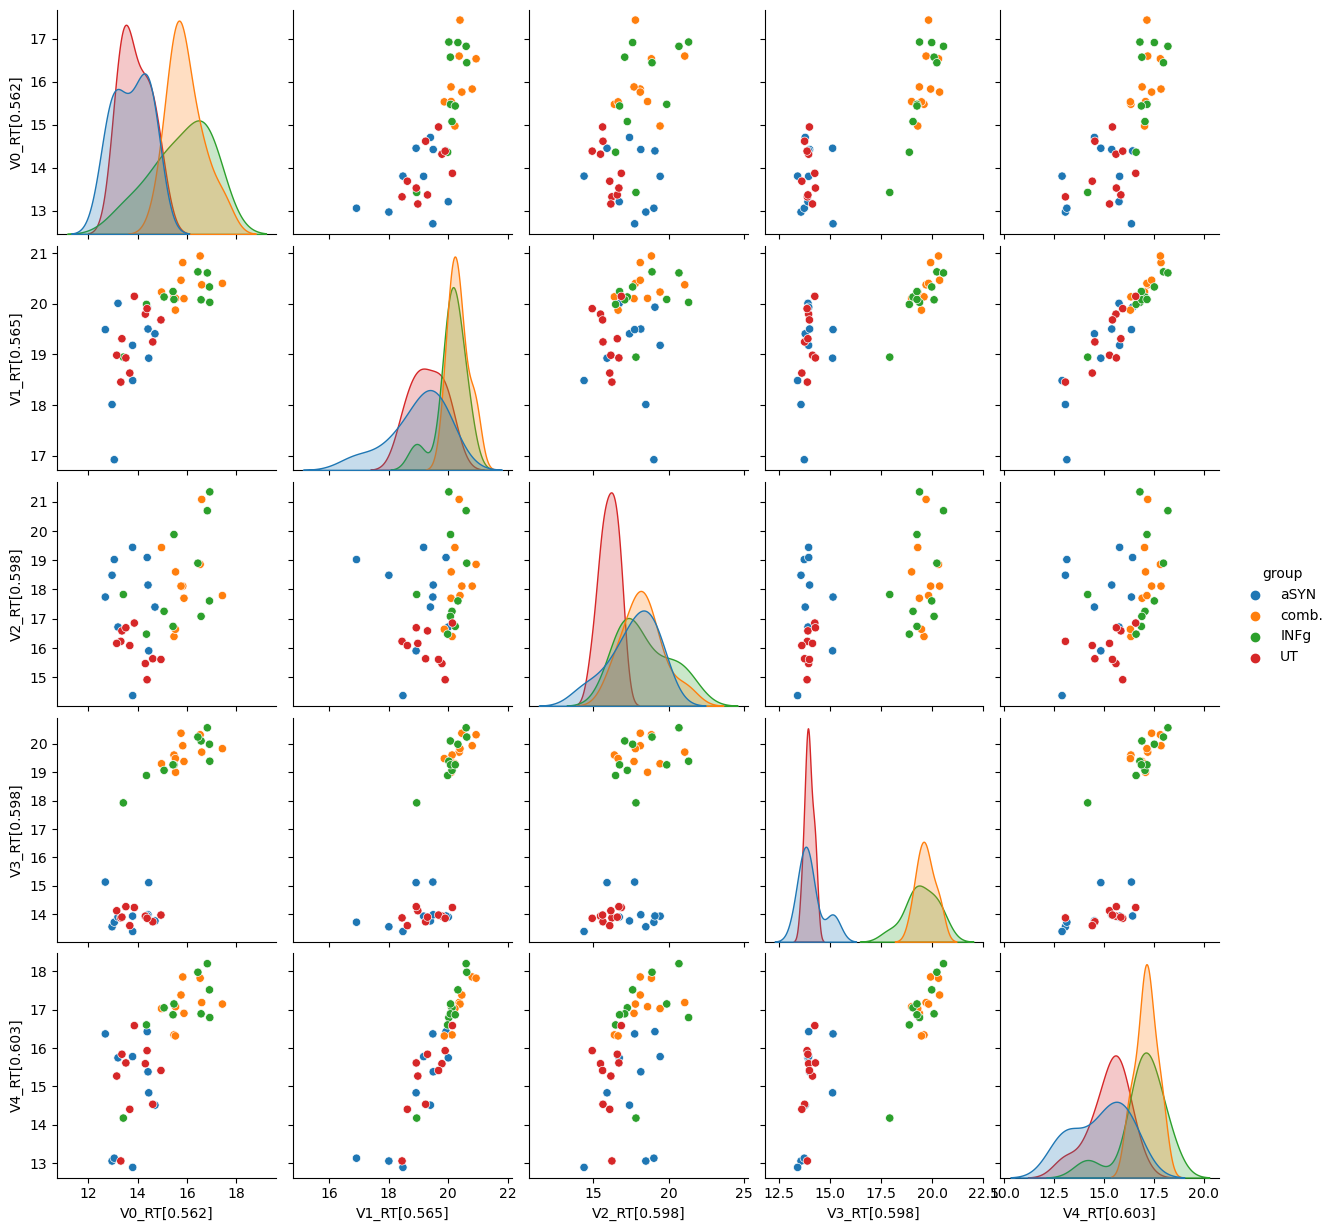

In [170]:
df_X = pd.DataFrame(X[:,cols], columns = ["V{}_RT{}".format(i,val) for i,val in enumerate(rtime[cols])])
df_X['group'] = groups.to_numpy(dtype=str)
complete_pairplot(df_X, group_col='group')

### ---------------------------------------------------------

### Plasma

In [319]:
data_X=data_significant.iloc[sorted_ind+4,:80]
X=data_significant.iloc[sorted_ind+4,8:80].to_numpy(dtype=float).T
times = data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)

### Cell

In [12]:
data_X=data_significant.iloc[sorted_ind+3,:48]
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
times = data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)

### Correlation distance

In [29]:
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X)
cov_mat =np.cov(X_std.T)
COR = np.cov(X_std.T, ddof=0)

In [14]:
# make a mask matrix by zeroing out all features whose times are not within dt=0.1 of each other
dt = 0.1
D_times = times[:,np.newaxis]-times[np.newaxis,:]
mask = np.abs(D_times) <= dt

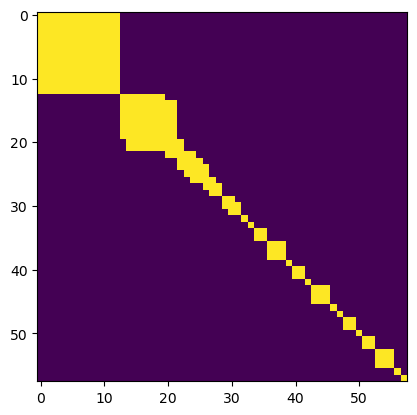

In [11]:
plt.imshow(mask)

In [30]:
# Make a distance matrix from the correlation matrix COR
mask = np.ones_like(COR)
CD = 1 - mask*COR
# make sure the diagonal is zero and the matrix is PD
CD = np.maximum(CD, CD.T)
CD -= np.diag(CD.diagonal())
CD=np.clip(CD,0,2)
cd_matrix = squareform(CD,force='tovector')

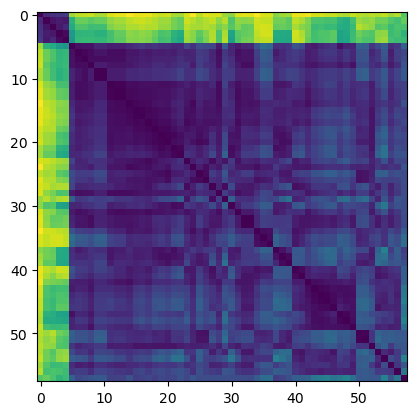

In [13]:
plt.imshow(VAT(CD))

In [14]:
cd_matrix.shape

(1653,)

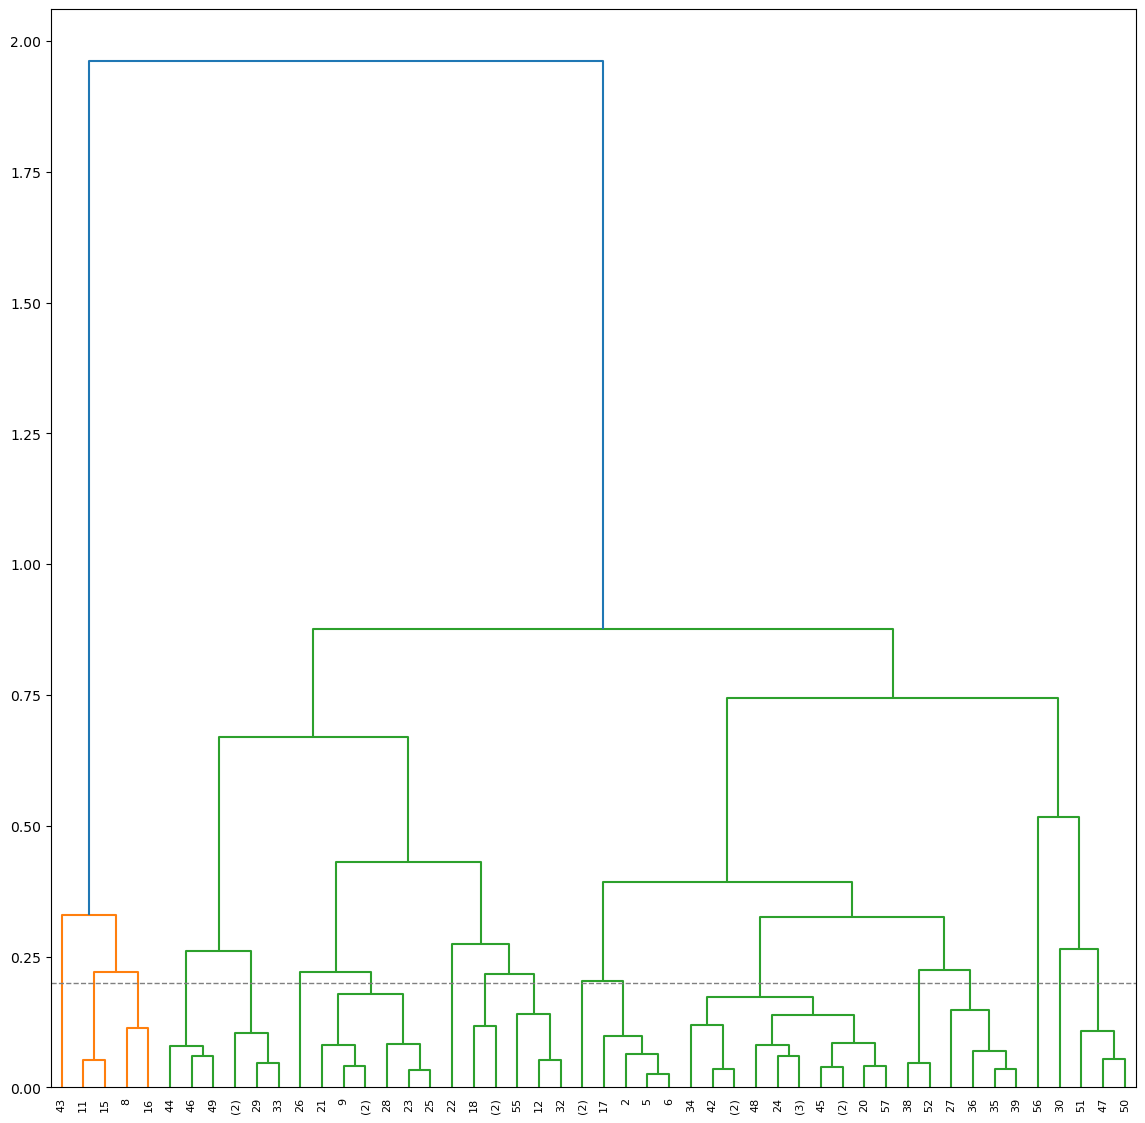

In [31]:
th=0.2
plt.figure(figsize=(14,14))
link_complete = hierarchy.linkage(cd_matrix, method='complete',  optimal_ordering=False)
hierarchy.dendrogram(link_complete, truncate_mode='lastp', p=50, labels=np.asarray(np.arange(CD.shape[0])))
plt.axhline(y=0.2, c='grey', lw=1, linestyle='dashed')
labels_complete=hierarchy.fcluster(link_complete, t=th, criterion='distance')

In [32]:
labels_complete

array([13, 13, 12, 13, 11, 12, 12, 11,  2,  6,  6,  1,  9, 13, 13,  1,  2,
       12,  8,  6, 13,  6, 10,  6, 13,  6,  7, 15,  6,  5, 17, 13,  9,  5,
       13, 15, 15, 13, 14, 15,  5,  5, 13,  3,  4, 13,  4, 16, 13,  4, 16,
       16, 14,  8,  8,  9, 18, 13], dtype=int32)

In [33]:
np.unique(labels_complete).shape

(18,)

In [19]:
inds=np.argsort(labels_complete)
result = data_X.iloc[inds,:]
result['labels_complete']=labels_complete[inds]
luniq=np.unique(labels_complete[inds])

C:\Users\paavo\AppData\Local\Temp\ipykernel_23900\729970858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['labels_complete']=labels_complete[inds]


In [20]:
k=luniq[3]
cluster_ind = np.where(labels_complete[inds]==k)[0]
cluster_names = result.iloc[cluster_ind,0].to_numpy(dtype=str)
cluster_times = result.iloc[cluster_ind,5].to_numpy(dtype=float)
cluster_mass = result.iloc[cluster_ind,4].to_numpy(dtype=float)
cluster_masstimes = ["{}@{}".format(m,t) for m,t in zip(cluster_mass,cluster_times)]

cluster = result.iloc[cluster_ind,8:48].to_numpy(dtype=float).T
#cluster = result.iloc[cluster_ind,8:80].to_numpy(dtype=float).T

df_cluster = pd.DataFrame(cluster, columns = cluster_masstimes)
df_cluster['group']=groups.to_numpy(dtype=str)
print(cluster_times)

[4.045 4.64  5.123]


In [40]:
#complete_pairplot(df_cluster.iloc[:,:-1].to_numpy(dtype=float), group_col=gender, kind='kde', palette=None)

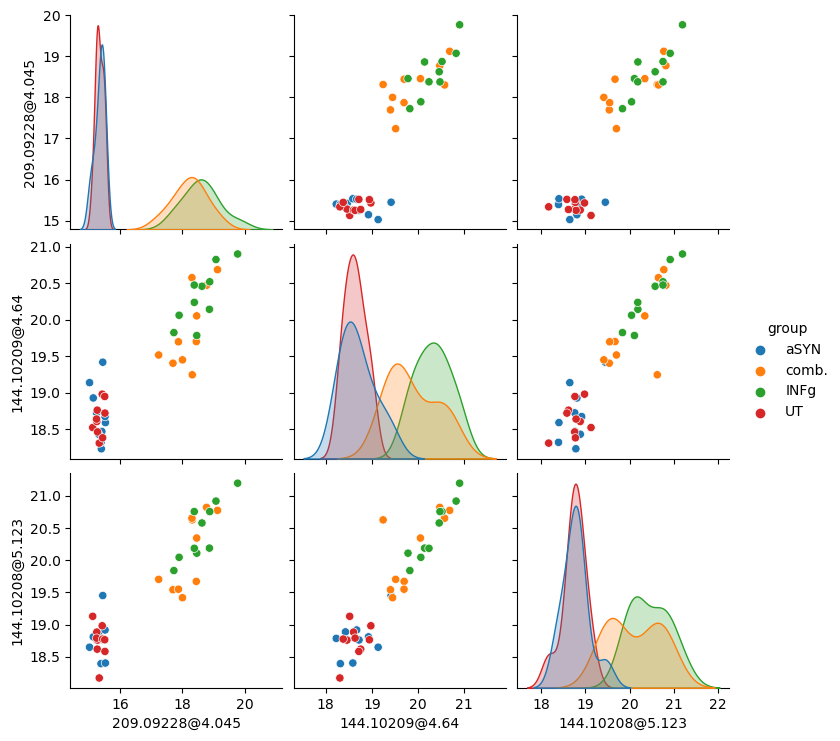

In [21]:
complete_pairplot(df_cluster, group_col='group', kind='kde', palette=None)

In [22]:
cluster_names

array(['Kynurenine', 'Stachydrine', '1-Aminocyclohexanecarboxylic acid'],
      dtype='<U33')

In [23]:
cluster_masstimes

['209.09228@4.045', '144.10209@4.64', '144.10208@5.123']

### Check the pvalues and tests for each peak (id'd by masstime)

In [24]:
mts, ps, ts, es = extract_pvalues(df_select,cluster_masstimes, pvalue_col=' p_FDR',head='')
tle = fname + "\ncluster ID: {}".format(k)
display_pvalues(mts, ps, ts, es, tle)

cellshilicposALPHA0.05FC1.0MINVAR0.125.csv
cluster ID: 4
-----------------------
Peak: 209.09228@4.045
P-values: [6e-06, 6e-06, 1e-05, 8e-06]
Tests: ['aSYN--comb.', 'aSYN--INFg', 'comb.--UT', 'INFg--UT']
Effects: [-2.87932, -3.261433, 2.882216, 3.264328]
-----------------------
Peak: 144.10209@4.64
P-values: [0.004474, 1e-05, 0.002967, 5e-06]
Tests: ['aSYN--comb.', 'aSYN--INFg', 'comb.--UT', 'INFg--UT']
Effects: [-1.188941, -1.632026, 1.248197, 1.691282]
-----------------------
Peak: 144.10208@5.123
P-values: [0.003397, 1.8e-05, 0.002927, 1.8e-05]
Tests: ['aSYN--comb.', 'aSYN--INFg', 'comb.--UT', 'INFg--UT']
Effects: [-1.327142, -1.673992, 1.363784, 1.710634]


### KMeans

In [37]:
from numba import njit, prange

@njit(parallel=True)
def kmeans(X, k, n_iter, init_centroids):
    #Fast parallel kmeans
    #Original implementation from old numba examples (here slightly modified)
    N = X.shape[0]
    D = X.shape[1]
    centroids = init_centroids
    
    for l in range(n_iter):
        dist = np.array([[np.sqrt(np.sum((X[i, :] - centroids[j, :])**2))
                                for j in range(k)] for i in range(N)])

        predictions = np.array([dist[i, :].argmin() for i in range(N)])
            
        centroids = np.array([[np.sum(X[predictions == i, j])/np.sum(predictions == i)
                                 for j in range(D)] for i in range(k)])

    return centroids, dist, predictions




@njit(parallel=True)
def kmeans_spherical(X, k, n_iter, init_centroids):
    #Fast parallel spherical kmeans
    #Original implementation from old numba examples (here slightly modified)
    
    N = X.shape[0]
    D = X.shape[1]
    centroids = init_centroids
    
    for i in range(centroids.shape[0]):
        centroids[i,:] = centroids[i,:]/np.sqrt(centroids[i,:]@centroids[i,:])
    
    for l in range(n_iter):
        dist = 1 - X@centroids.T
        
        predictions = np.array([dist[i, :].argmin() for i in range(N)])
            
        centroids = np.array([[np.sum(X[predictions == i, j])/np.sum(predictions == i)
                                 for j in range(D)] for i in range(k)])
        
        for i in range(centroids.shape[0]):
            centroids[i,:] = centroids[i,:]/np.sqrt(centroids[i,:]@centroids[i,:])

    return centroids, dist, predictions


In [35]:
x=X_std.T
K=13
xinit=x[np.random.choice(range(x.shape[0]),K),:]

In [1]:
xinit.shape

NameError: name 'xinit' is not defined

In [ ]:
centroids, dist, predictions = kmeans_spherical(x, K, 1000, xinit)

In [ ]:
predictions

## NOISE

In [597]:
i1=np.arange(10)
i2=np.arange(10,20)
i3=np.arange(20,30)
i4=np.arange(30,40)
I=[i1,i2,i3,i4]

In [688]:
fnum=5
pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

fname = filenamesGF[fnum].split('GF')[0]

cellslipidposGFstatus.csv


cellsRPnegGFstatus.csv


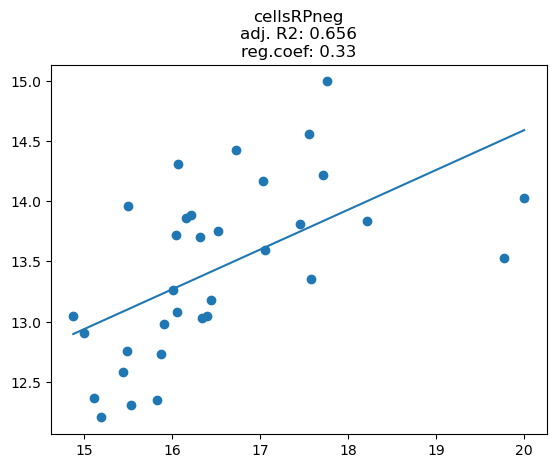

cellsRPposGFstatus.csv


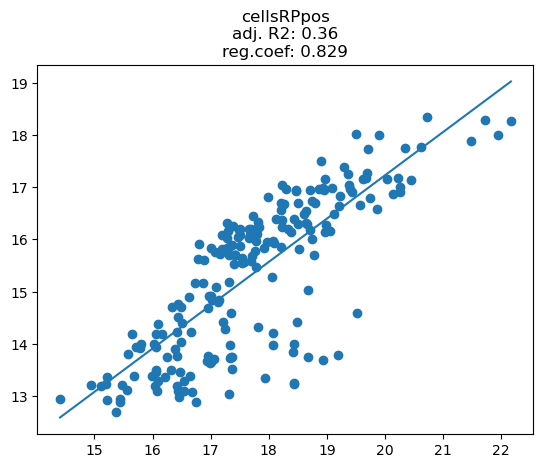

cellshilicnegGFstatus.csv


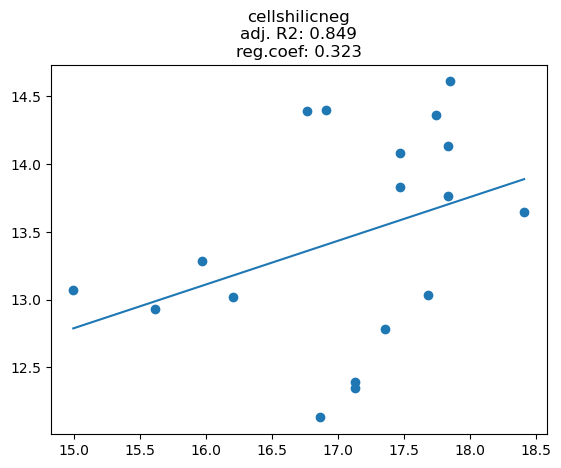

cellshilicposGFstatus.csv


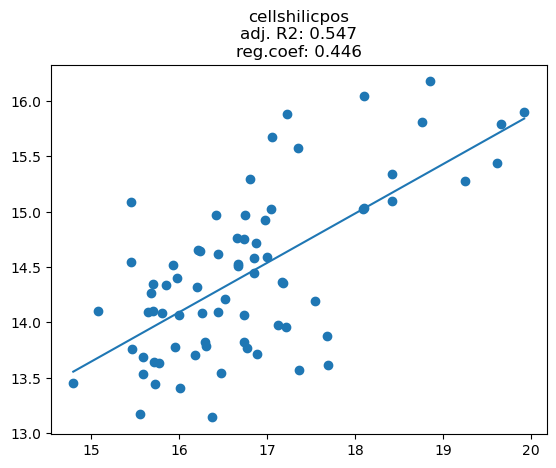

cellslipidnegGFstatus.csv


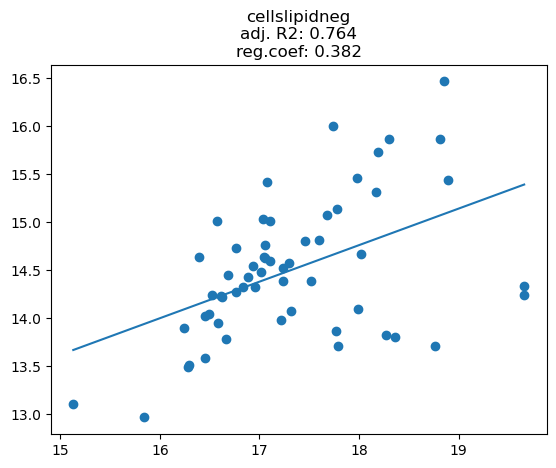

cellslipidposGFstatus.csv


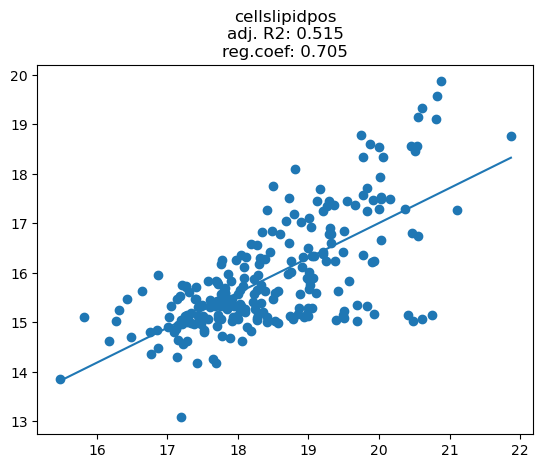

mediumRPnegGFstatus.csv


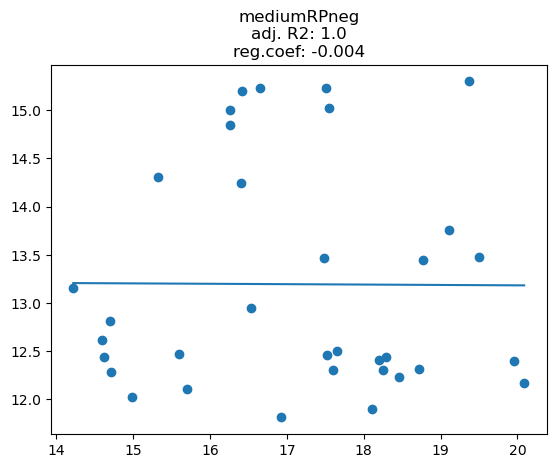

mediumRPposGFstatus.csv


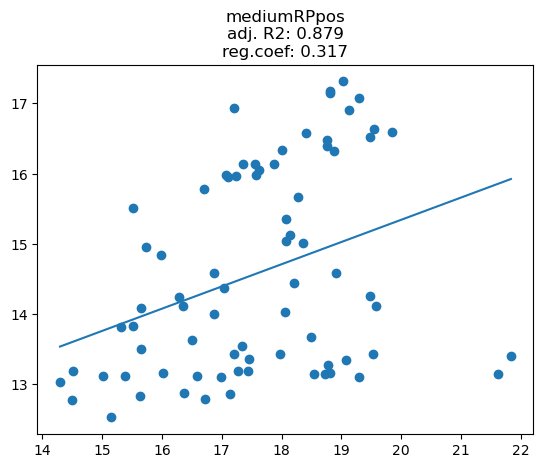

mediumhilicnegGFstatus.csv


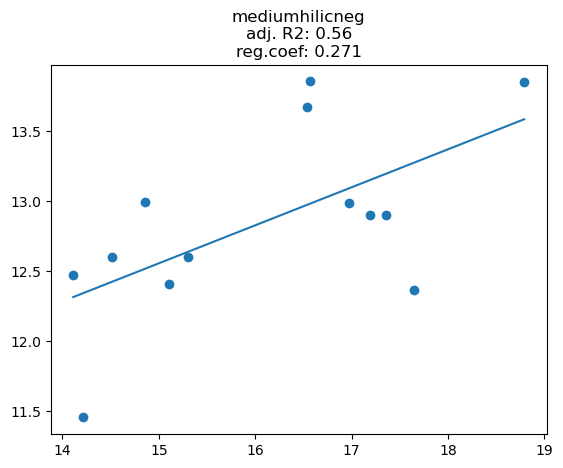

mediumhilicposGFstatus.csv


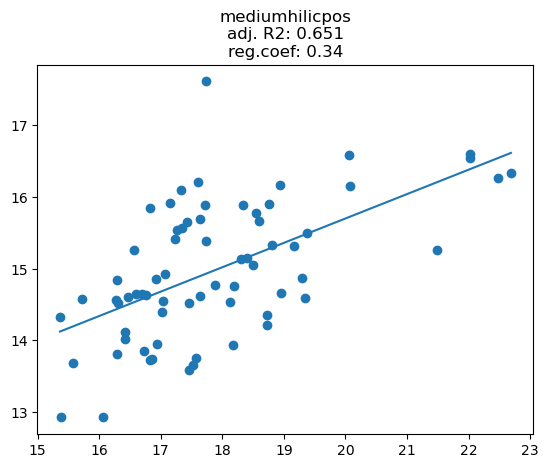

In [715]:
tags=['aSYN','comb','IFNg','UT']
I=[np.arange(10),np.arange(10,20),np.arange(20,30),np.arange(30,40)]

for fnum in range(10):
    pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
    filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
    print(filenamesGF[fnum])
    data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

    fname = filenamesGF[fnum].split('GF')[0]

    Area=data.iloc[3:,8:48].to_numpy(dtype=float)
    Noise=data.iloc[3:,88:128].to_numpy(dtype=int)==32
    Noise=np.asarray(Noise, dtype=int)

    noiseless_mean, noisy_mean = [], []#np.zeros((Noise.shape[0],4)), np.zeros((Noise.shape[0],4))
    for feat in range(Noise.shape[0]):
        area = Area[feat,:]
        nless=area[np.where(Noise[feat,:]==0)[0]]
        n=area[np.where(Noise[feat,:]==1)[0]]

        if(len(n)<=2 or len(nless)<=5):
            continue

        noiseless_mean.append(nless.mean())
        noisy_mean.append(n.mean())

    noiseless_mean=np.asarray(noiseless_mean)
    noisy_mean=np.asarray(noisy_mean)

    xx=np.stack((np.ones_like(noiseless_mean),noiseless_mean)).T
    yy=noisy_mean
    bb=np.linalg.inv(xx.T@xx)@xx.T@yy

    yhat=xx@bb
    N, p=len(yy), 2
    SSR=(yhat - yy.mean()).T@(yhat - yy.mean())
    SST=(yy- yy.mean()).T@(yy - yy.mean())
    R2=1 - SSR*(N-1)/(SST*(N-p-1))

    xxx=np.stack((np.ones_like(noiseless_mean),np.linspace(noiseless_mean.min(), noiseless_mean.max(),len(noiseless_mean)))).T
    ypred=xxx@bb

    plt.scatter(noiseless_mean, noisy_mean)
    plt.plot(xxx[:,1],ypred)
    plt.title("{}\nadj. R2: {}\nreg.coef: {}".format(fname,np.round(R2,3),np.round(bb[1],3)))
    plt.show()

cellsRPnegGFstatus.csv


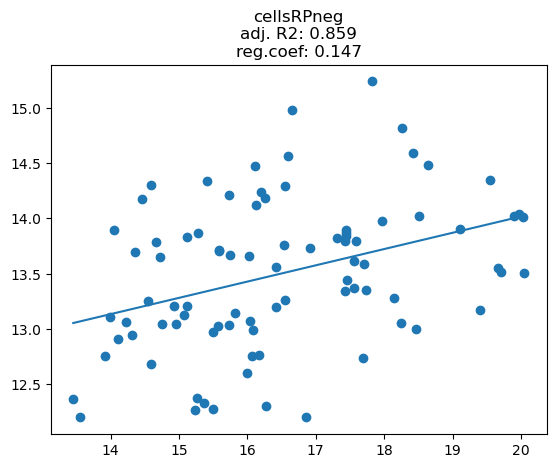

cellsRPposGFstatus.csv


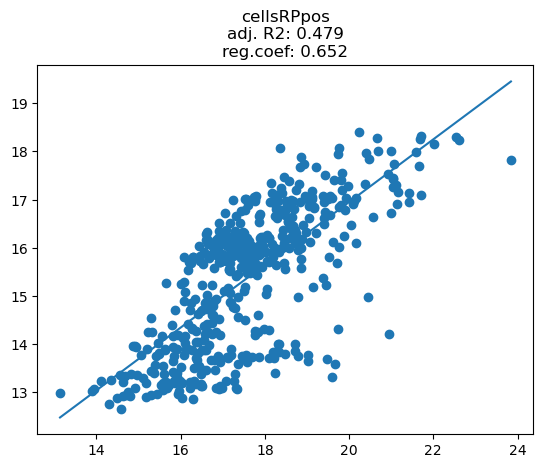

cellshilicnegGFstatus.csv


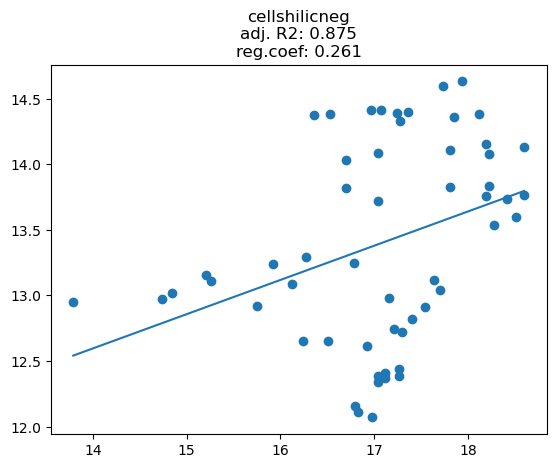

cellshilicposGFstatus.csv


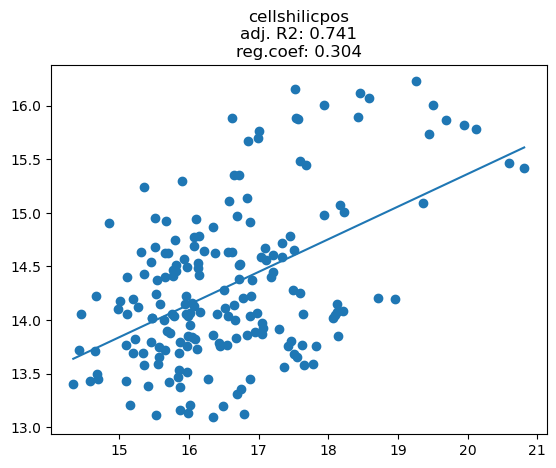

cellslipidnegGFstatus.csv


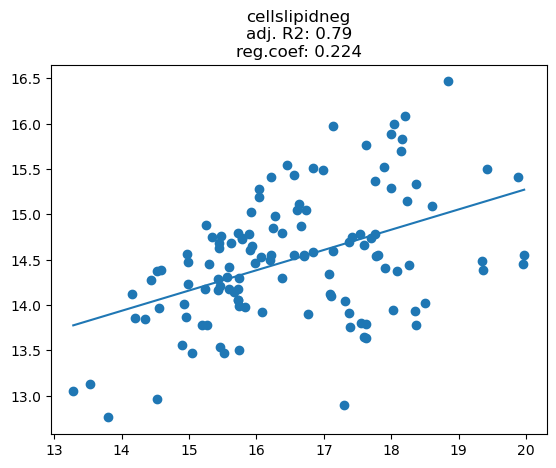

cellslipidposGFstatus.csv


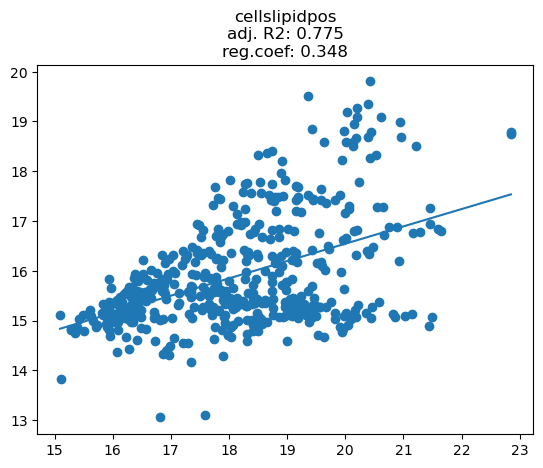

mediumRPnegGFstatus.csv


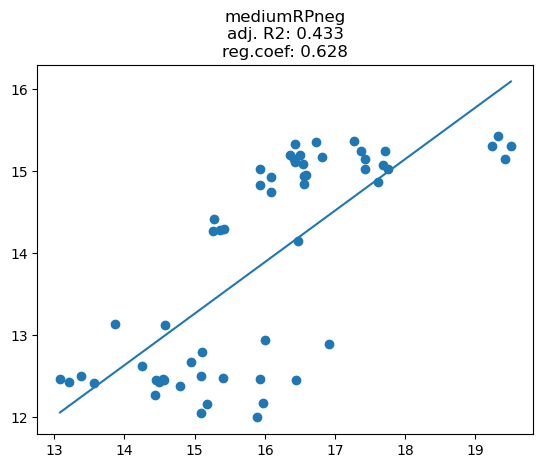

mediumRPposGFstatus.csv


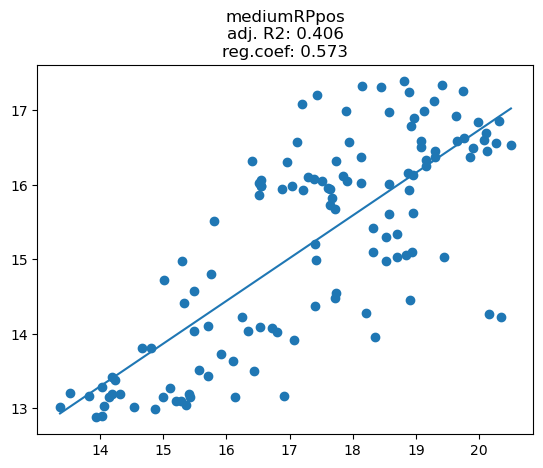

mediumhilicnegGFstatus.csv


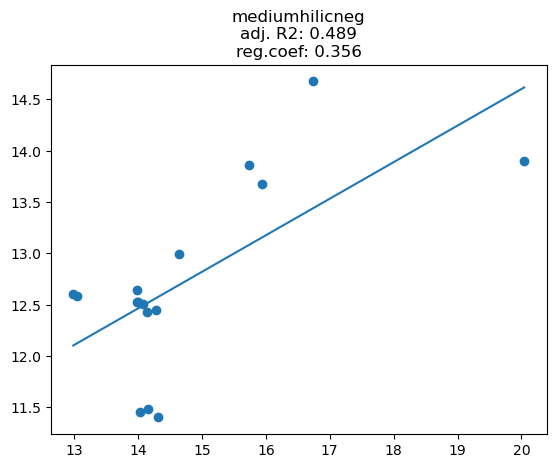

mediumhilicposGFstatus.csv


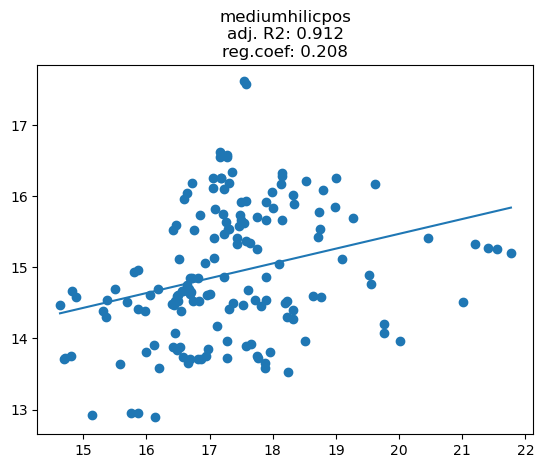

In [706]:
tags=['aSYN','comb','IFNg','UT']
I=[np.arange(10),np.arange(10,20),np.arange(20,30),np.arange(30,40)]

for fnum in range(10):
    pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
    filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
    print(filenamesGF[fnum])
    data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

    fname = filenamesGF[fnum].split('GF')[0]

    Area=data.iloc[3:,8:48].to_numpy(dtype=float)
    Noise=data.iloc[3:,88:128].to_numpy(dtype=int)==32
    Noise=np.asarray(Noise, dtype=int)

    noiseless_mean, noisy_mean = [], []#np.zeros((Noise.shape[0],4)), np.zeros((Noise.shape[0],4))
    g = []

    for feat in range(Noise.shape[0]):
        t=0
        for inds in I:
            area = Area[feat,inds]
            nless=area[np.where(Noise[feat,inds]==0)[0]]
            n=area[np.where(Noise[feat,inds]==1)[0]]

            if(len(n)<=1 or len(nless)<=1):
                continue

            #noiseless_mean[feat, group]=nless_m
            #noisy_mean[feat, group]=n_m
            noiseless_mean.append(nless.mean())
            noisy_mean.append(n.mean())
            g.append(t)
            t+=1

    noiseless_mean=np.asarray(noiseless_mean)
    noisy_mean=np.asarray(noisy_mean)
    g=np.array(g)

    xx=np.stack((np.ones_like(noiseless_mean),noiseless_mean)).T
    yy=noisy_mean
    bb=np.linalg.inv(xx.T@xx)@xx.T@yy

    yhat=xx@bb
    N, p=len(yy), 2
    SSR=(yhat - yy.mean()).T@(yhat - yy.mean())
    SST=(yy- yy.mean()).T@(yy - yy.mean())
    R2=1 - SSR*(N-1)/(SST*(N-p-1))

    xxx=np.stack((np.ones_like(noiseless_mean),np.linspace(noiseless_mean.min(), noiseless_mean.max(),len(noiseless_mean)))).T
    ypred=xxx@bb

    plt.scatter(noiseless_mean, noisy_mean)#,c=g)
    plt.plot(xxx[:,1],ypred)
    plt.title("{}\nadj. R2: {}\nreg.coef: {}".format(fname,np.round(R2,3),np.round(bb[1],3)))
    plt.show()

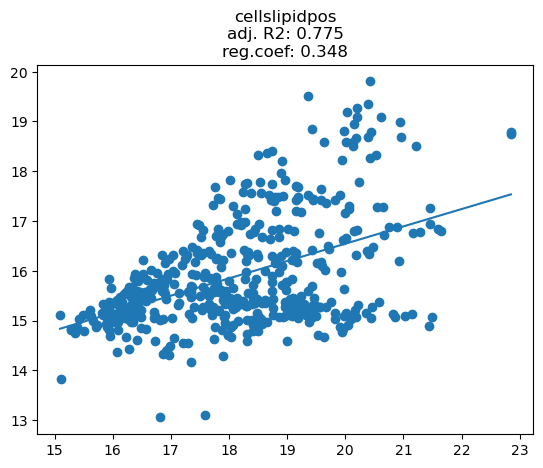

In [695]:
xx=np.stack((np.ones_like(noiseless_mean),noiseless_mean)).T
yy=noisy_mean
bb=np.linalg.inv(xx.T@xx)@xx.T@yy

yhat=xx@bb
N, p=len(yy), 2
SSR=(yhat - yy.mean()).T@(yhat - yy.mean())
SST=(yy- yy.mean()).T@(yy - yy.mean())
R2=1 - SSR*(N-1)/(SST*(N-p-1))

xxx=np.stack((np.ones_like(noiseless_mean),np.linspace(noiseless_mean.min(), noiseless_mean.max(),len(noiseless_mean)))).T
ypred=xxx@bb

plt.scatter(noiseless_mean, noisy_mean)
plt.plot(xxx[:,1],ypred)
plt.title("{}\nadj. R2: {}\nreg.coef: {}".format(fname,np.round(R2,3),np.round(bb[1],3)))
plt.show()

# ---------------------------------------------------------------------------------------------------

In [483]:
cluster.shape

(40, 6)

In [484]:
k=2
arr1=cluster[:10,k]
arr2=cluster[10:20,k]
arr3=cluster[20:30,k]
arr4=cluster[30:,k]

In [485]:
eff, sample = bootstrapped_effect(arr2, arr4, it = 10000)

(array([3.000e+00, 8.000e+00, 3.000e+01, 9.500e+01, 2.940e+02, 5.860e+02,
        1.015e+03, 1.346e+03, 1.555e+03, 1.598e+03, 1.295e+03, 9.650e+02,
        5.950e+02, 3.610e+02, 1.350e+02, 8.400e+01, 2.400e+01, 8.000e+00,
        2.000e+00, 1.000e+00]),
 array([1.15869789, 1.27826172, 1.39782556, 1.5173894 , 1.63695324,
        1.75651708, 1.87608092, 1.99564476, 2.1152086 , 2.23477244,
        2.35433628, 2.47390012, 2.59346396, 2.7130278 , 2.83259164,
        2.95215548, 3.07171932, 3.19128315, 3.31084699, 3.43041083,
        3.54997467]),
 <BarContainer object of 20 artists>)

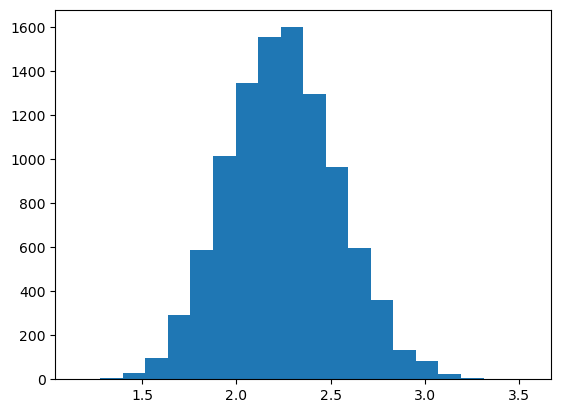

In [486]:
plt.hist(sample, bins=20)

### Clusters only using rtimes

In [47]:
dt=0.05
mask=np.asarray(np.abs(rtime-rtime.T)<=dt,dtype=int)
labels_mask=mask2assignments(mask)

In [48]:
inds=np.argsort(labels_mask)
result = data_X.iloc[inds,:]
result['labels_complete']=labels_mask[inds]
luniq=np.unique(labels_mask[inds])

C:\Users\paavo\AppData\Local\Temp\ipykernel_26876\2760557883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['labels_complete']=labels_mask[inds]


In [57]:
k=luniq[4]
cluster_ind = np.where(labels_mask[inds]==k)[0]
cluster_names = result.iloc[cluster_ind,0].to_numpy(dtype=str)
cluster_times = result.iloc[cluster_ind,5].to_numpy(dtype=float)
cluster_mass = result.iloc[cluster_ind,4].to_numpy(dtype=float)
cluster_masstimes = ["{}@{}".format(m,t) for m,t in zip(cluster_mass,cluster_times)]

cluster = result.iloc[cluster_ind,8:48].to_numpy(dtype=float).T
#df_cluster = pd.DataFrame(cluster, columns = ["V{}_RT{}".format(i,val) for i,val in enumerate(cluster_times)])
df_cluster = pd.DataFrame(cluster, columns = cluster_masstimes)
df_cluster['group']=groups.to_numpy(dtype=str)
print(cluster_times)

[0.719 0.732]


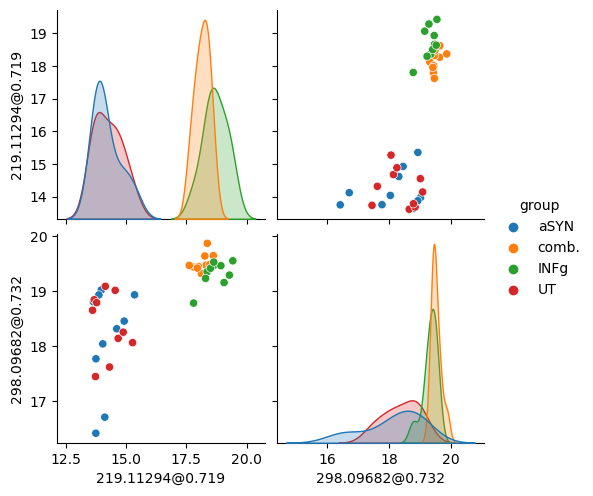

In [58]:
complete_pairplot(df_cluster, group_col='group')

In [59]:
mts, ps, ts, es = extract_pvalues(df_select,cluster_masstimes)
tle = fname + "\ncluster ID: {}".format(k)
display_pvalues(mts, ps, ts, es, tle)

cellshilicposALPHA0.05FC1.0MINVAR0.125.csv
cluster ID: 4.0
-----------------------
Peak: 219.11294@0.719
P-values: [0.0, 0.0, 0.0, 0.0]
Tests: ['aSYN--comb.', 'aSYN--INFg', 'comb.--UT', 'INFg--UT']
Effects: [-3.942068, -4.484833, 3.881808, 4.424574]
-----------------------
Peak: 298.09682@0.732
P-values: [0.015312]
Tests: ['comb.--UT']
Effects: [1.126316]


## Designs

In [60]:
#pd.get_dummies(groups)

In [61]:
y=df_cluster.iloc[:,0].to_numpy(dtype=float)

In [81]:
X_d=pd.get_dummies(groups).to_numpy()

In [80]:
groups

8      aSYN
9      aSYN
10     aSYN
11     aSYN
12     aSYN
13     aSYN
14     aSYN
15     aSYN
16     aSYN
17     aSYN
18    comb.
19    comb.
20    comb.
21    comb.
22    comb.
23    comb.
24    comb.
25    comb.
26    comb.
27    comb.
28     INFg
29     INFg
30     INFg
31     INFg
32     INFg
33     INFg
34     INFg
35     INFg
36     INFg
37     INFg
38       UT
39       UT
40       UT
41       UT
42       UT
43       UT
44       UT
45       UT
46       UT
47       UT
Name: 0, dtype: object

In [82]:
X_d

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [83]:
β = np.linalg.inv(X_d.T@X_d)@X_d.T@y

In [84]:
β

array([18.69510253, 14.27052887, 14.21026936, 18.15233718])

In [85]:
# 4-way contrast (model for means)
C = np.array(
    [[1,-1,0,0],
     [1,0,-1,0],
     [1,0,0,-1],
     [0,1,-1,0],
     [0,1,0,-1],
     [0,0,1,-1]]
)
C

array([[ 1, -1,  0,  0],
       [ 1,  0, -1,  0],
       [ 1,  0,  0, -1],
       [ 0,  1, -1,  0],
       [ 0,  1,  0, -1],
       [ 0,  0,  1, -1]])

In [86]:
C@β

array([ 4.42457366,  4.48483317,  0.54276535,  0.06025951, -3.88180831,
       -3.94206782])

Effects: [-2.87932, -3.261433, 2.882216, 3.264328]
Effects: [-1.327142, -1.673992, 1.363784, 1.710634]
Effects: [-1.188941, -1.632026, 1.248197, 1.691282]

## ANOVA

In [91]:
from statsmodels.formula.api import ols
from scipy.stats import t

In [92]:
def dof_estimate(x1, x2):
    n1, n2 = len(x1), len(x2)
    s1, s2 = x1.var(ddof=1)/n1, x2.var(ddof=1)/n2

    return (s1 + s2)**2 / (s1**2/(n1-1) + s2**2/(n2-1))
    
def t_stat(x1,x2):
    n1, n2 = len(x1), len(x2)
    m1, m2 = x1.mean(), x2.mean()
    s1, s2 = x1.var(ddof=1)/n1, x2.var(ddof=1)/n2
    
    return (m1 - m2) / np.sqrt(s1 + s2)

def t_test(x1, x2):
    # p-value for 2-sided test
    tstat = t_stat(x1, x2)
    dof = dof_estimate(x1,x2)
    
    return 2*(1 - t.cdf(abs(tstat), dof)), tstat, dof

In [135]:
data =data_significant.iloc[sorted_ind+3,:] 
X=data.iloc[:,8:48].to_numpy(dtype=float).T

In [147]:
k=1
#design = make_oneWay_design(groups)
M=X_d
inds=np.array([i for i in range(40) if i not in range(10,30)])
#inds = np.arange(20)
ydata=X[inds,k]

In [137]:
groups.iloc[inds]

8     aSYN
9     aSYN
10    aSYN
11    aSYN
12    aSYN
13    aSYN
14    aSYN
15    aSYN
16    aSYN
17    aSYN
38      UT
39      UT
40      UT
41      UT
42      UT
43      UT
44      UT
45      UT
46      UT
47      UT
Name: 0, dtype: object

In [148]:
t_test(ydata[:10],ydata[10:20])

(0.027417653951613996, 2.400165828131651, 17.999818111639314)

In [149]:
M[:,2]=1
M=M[:20,2:]
M

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In [150]:
β = np.linalg.inv(M.T@M)@M.T@ydata

In [151]:
β

array([19.02438486, -0.31174559])

In [152]:
xdata

,area,group
0,13.660161,2.0
1,13.748243,2.0
2,16.495965,2.0
3,16.126290,2.0
4,15.960166,2.0
5,16.171138,2.0
6,15.622260,2.0
7,15.346693,2.0
8,16.469351,2.0
9,16.131494,2.0


In [156]:
print(data.iloc[k,0])
xdata = pd.DataFrame(np.hstack((X[inds,k][:,np.newaxis],labels[inds,np.newaxis])), columns=['area','group'])
res = ols(formula="area~1 + group", data=xdata).fit()
res.summary()

nan


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     5.761
Date:                Thu, 29 Jun 2023   Prob (F-statistic):             0.0274
Time:                        23:37:10   Log-Likelihood:                -2.5974
No. Observations:                  20   AIC:                             9.195
Df Residuals:                      18   BIC:                             11.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.4009      0.205     89.600      0.000      17.969      18.832
group          0.3117      0.130      2.400      0.027       0.039       0.585
==============================================================================
Omnibus:                        2.017   Durbin-Watson:                   2.607
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.142
Skew:                          -0.229   Prob(JB):                        0.565
Kurtosis:                       1.923   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
res.tvalues

C(group)[0.0]    85.574404
C(group)[1.0]    79.604158
C(group)[2.0]    77.699851
C(group)[3.0]    86.891238
dtype: float64

In [216]:
I1=np.ones((3,1))
I2=np.ones((3,1))
I3=np.ones((2,1))
I4=np.ones((4,1))
Z=np.zeros((12,1))

In [84]:
M=np.array([[1,0,1,0],[1,0,0,0],[1,1,1,1],[1,1,0,0]])
M

array([[1, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 0, 0]])

In [85]:
M.T@M

array([[4, 2, 2, 1],
       [2, 2, 1, 1],
       [2, 1, 2, 1],
       [1, 1, 1, 1]])

In [86]:
np.linalg.inv(M.T@M)@M.T

array([[ 0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.],
       [ 1., -1.,  0.,  0.],
       [-1.,  1.,  1., -1.]])

In [91]:
M=np.array([[1,0,1,0],[1,0,0,0],[0,1,1,1],[0,1,0,0]])
M

array([[1, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 0]])

In [92]:
np.linalg.inv(M.T@M)@M.T

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1., -1.,  0.,  0.],
       [-1.,  1.,  1., -1.]])

In [87]:
from sympy import *

In [93]:
y1,y2,y3,y4=symbols('y1 y2 y3 y4')

In [94]:
Matrix([[y1],[y2],[y3],[y4]])

Matrix([
[y1],
[y2],
[y3],
[y4]])

In [95]:
np.linalg.inv(M.T@M)@M.T@Matrix([[y1],[y2],[y3],[y4]])

Matrix([
[                            1.0*y2],
[                            1.0*y4],
[                   1.0*y1 - 1.0*y2],
[-1.0*y1 + 1.0*y2 + 1.0*y3 - 1.0*y4]])